# Graph Analysis
### Walk,s trails, paths, and cycles in graphs
A **walk** is a sequence of nodes and edges where each edge connects its preceding and following node.
<br>A trail is a walk where edges are distinct (no edge is repeated).
<br>A path is a walk where all vertices are distinct (and thus all edges are distinct).
<br>A cycle is a closed path where only the start/end vertex repeats: v0=vkv0​=vk​, and all other vertices are distinct.

**Eulerian trail** (or **Eulerian path**) is a **trail** in a graph that visits every edge exactly once. 
- It is named after *Leonhard Euler*, who solved the famous *Königsberg bridges problem* in 1736, laying the foundations of **graph theory**.
- In an *Eulerian trail*, nodess may be repeated (unlike in a path).

**Eulerian circuit/cycle:** If the *Eulerian trail* starts and ends at the same node, it is called an *Eulerian circuit* (or *Eulerian cycle*).
<br>**Theorem:** An **undirected** graph has an **Eulerian trail** if and only if:
- Exactly zero or two nodes of the graph have odd degree.
  - If zero nodes have odd degree, the graph has an **Eulerian circuit** (starts and ends at the same vertex).
  - If exactly two nodes have odd degree, the graph has an **Eulerian trail** (starts at one odd-degree node and ends at the other).

<hr>   

In **directed** graphs, similar conditions apply:
- **Eulerian circuit:** All nodes have equal in-degree and out-degree.
- **Eulerian trail:** Exactly one node has out-degree = in-degree + 1 (start), one has in-degree = out-degree + 1 (end), others balanced.
<hr>

In the following, we define a graph and give a few test sequences of walk, trail, and path on the graph. Then, we let our **graph analyzer** check these sequences. Finally, we ask if the graph has Eulerian trail or circuit.
<br>The **Python** code has been written from scratch.
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import module to diplay graph
import networkx as nx

In [2]:
# Define the class to hold functions to check 
# walk, trail, path, and Eulerian trail/circuit
# The graph in the argument is given as an adjacency list
class GraphAnalyzer:
    def __init__(self, graph):
        """
        Initialize with graph as adjacency list.
        Example: {1: [2, 3], 2: [1, 3], 3: [1, 2]}
        """
        self.graph = graph # an adjacenty list
        # all the edges of graph (without duplicates)
        self.all_edges = self._get_all_edges()
        
    def _get_all_edges(self):
        """Get all edges as sorted tuples to avoid duplicates."""
        edges = set()
        for u, neighbors in self.graph.items():
            for v in neighbors:
                edges.add(tuple(sorted((u, v))))
        return edges

    def is_walk(self, sequence):
        """Check if sequence is a valid walk."""
        if len(sequence) < 2:
            return False
            
        for i in range(len(sequence) - 1):
            u, v = sequence[i], sequence[i+1]
            if v not in self.graph.get(u, []):
                return False
        return True

    def is_trail(self, sequence):
        """Check if sequence is a trail (no repeated edges)."""
        if not self.is_walk(sequence):
            return False
            
        # Track edges used
        used_edges = set()
        for i in range(len(sequence) - 1):
            u, v = sequence[i], sequence[i+1]
            edge = tuple(sorted((u, v)))
            
            if edge in used_edges:
                return False
            used_edges.add(edge)
            
        return True

    def is_path(self, sequence):
        """Check if sequence is a path (no repeated nodes)."""
        if not self.is_walk(sequence):
            return False
            
        # Check for duplicate nodes
        if len(sequence) != len(set(sequence)):
            return False
            
        return True

    def is_cycle(self, sequence):
        """Check if sequence is a cycle (closed path)."""
        if not self.is_walk(sequence):
            return False
            
        # Must be closed: start == end
        if sequence[0] != sequence[-1]:
            return False
            
        # All nodes distinct, except start/end
        if len(sequence) - 1 != len(set(sequence)):
            return False
            
        return True

    def get_degree(self, node):
        """Get degree of a node."""
        return len(self.graph.get(node, []))

    def has_eulerian_trail(self):
        """Check if graph has an Eulerian trail."""
        odd_degree_count = 0
        for node in self.graph:
            if self.get_degree(node) % 2 != 0:
                odd_degree_count += 1
                
        # Eulerian trail exists if 0 or 2 nodes have odd degree
        return odd_degree_count in [0, 2]

    def has_eulerian_circuit(self):
        """Check if graph has an Eulerian circuit."""
        # All nodes must have even degree
        for node in self.graph:
            if self.get_degree(node) % 2 != 0:
                return False
        return True

    def is_eulerian_trail(self, sequence):
        """Check if sequence is a valid Eulerian trail."""
        # Must be a trail
        if not self.is_trail(sequence):
            return False
            
        # Must use all edges exactly once
        used_edges = set()
        for i in range(len(sequence) - 1):
            u, v = sequence[i], sequence[i+1]
            edge = tuple(sorted((u, v)))
            used_edges.add(edge)
            
        return used_edges == self.all_edges

    def is_eulerian_circuit(self, sequence):
        """Check if sequence is a valid Eulerian circuit."""
        # Must be a trail that starts and ends at same node
        if not self.is_eulerian_trail(sequence):
            return False
            
        return sequence[0] == sequence[-1]

In [3]:
# Example usage
# Example graph: Triangle with an extra edge
graph = {
    1: [2, 3, 4],
    2: [1, 3],
    3: [1, 2],
    4: [1]
}

# Test sequences
test_sequences = {
    "walk1": [1, 2, 3, 1],          # Valid walk
    "walk2": [1, 2, 3, 1, 4],       # Valid walk
    "trail1": [1, 2, 3, 1],         # Valid trail (no repeated edges)
    "trail2": [1, 2, 3, 1, 2],      # Invalid trail (edge 1-2 repeated)
    "path1": [1, 2, 3],             # Valid path
    "path2": [1, 2, 3, 1],          # Invalid path (vertex 1 repeated)
    "cycle1": [1, 2, 3, 1],         # Valid cycle
    "cycle2": [1, 2, 3, 4, 1],      # Invalid cycle (not all edges exist)
}

In [4]:
# Analyze the graph
analyzer = GraphAnalyzer(graph)
print("Graph Analysis Results:")
print("=" * 50)

for name, seq in test_sequences.items():
    print(f"{name:10}: {seq}")
    print(f"  Is walk:    {analyzer.is_walk(seq)}")
    print(f"  Is trail:   {analyzer.is_trail(seq)}")
    print(f"  Is path:    {analyzer.is_path(seq)}")
    print(f"  Is cycle:   {analyzer.is_cycle(seq)}")
    print()

# Eulerian properties
print("Eulerian Properties:")
print(f"Has Eulerian trail:   {analyzer.has_eulerian_trail()}")
print(f"Has Eulerian circuit: {analyzer.has_eulerian_circuit()}")

# Test Eulerian trail (this graph doesn't have one)
euler_test = [1, 2, 3, 1, 4]
print(f"\nIs Eulerian trail: {analyzer.is_eulerian_trail(euler_test)}")

Graph Analysis Results:
walk1     : [1, 2, 3, 1]
  Is walk:    True
  Is trail:   True
  Is path:    False
  Is cycle:   True

walk2     : [1, 2, 3, 1, 4]
  Is walk:    True
  Is trail:   True
  Is path:    False
  Is cycle:   False

trail1    : [1, 2, 3, 1]
  Is walk:    True
  Is trail:   True
  Is path:    False
  Is cycle:   True

trail2    : [1, 2, 3, 1, 2]
  Is walk:    True
  Is trail:   False
  Is path:    False
  Is cycle:   False

path1     : [1, 2, 3]
  Is walk:    True
  Is trail:   True
  Is path:    True
  Is cycle:   False

path2     : [1, 2, 3, 1]
  Is walk:    True
  Is trail:   True
  Is path:    False
  Is cycle:   True

cycle1    : [1, 2, 3, 1]
  Is walk:    True
  Is trail:   True
  Is path:    False
  Is cycle:   True

cycle2    : [1, 2, 3, 4, 1]
  Is walk:    False
  Is trail:   False
  Is path:    False
  Is cycle:   False

Eulerian Properties:
Has Eulerian trail:   True
Has Eulerian circuit: False

Is Eulerian trail: True


In [5]:
# Extra, a function to convert your graph to Networkx style,
# introduced in an earlier post
def convert_to_networkx(your_graph, directed=False):
    """
    Convert your custom graph to NetworkX format.
    your_graph: dict in format {node: [neighbors]}
    """
    if directed:
        nx_graph = nx.DiGraph()
    else:
        nx_graph = nx.Graph()
    
    for u, neighbors in your_graph.items():
        for v in neighbors:
            if isinstance(v,tuple):
                nx_graph.add_edge(u, v[0],weight=v[1])
            else:
                nx_graph.add_edge(u, v)
    
    return nx_graph

The sample graph we used in our analysis:


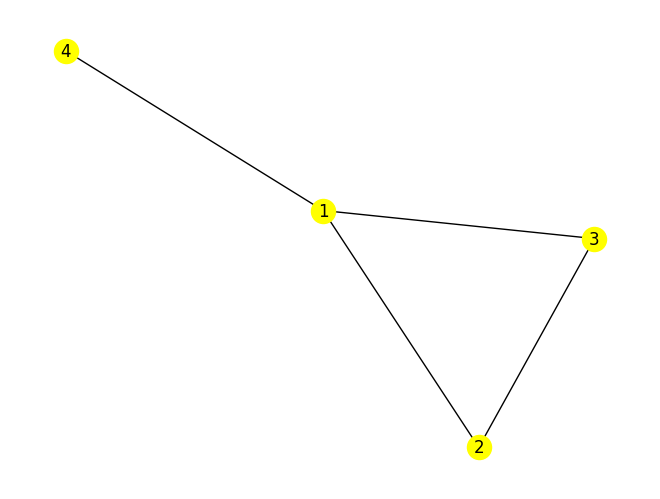

In [7]:
# Let's show the used graph by NetworkX
print('The sample graph we used in our analysis:')
nx_graph=convert_to_networkx(graph)
nx.draw(nx_graph,with_labels=True,node_color='yellow')